In [41]:
import nltk
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import string
import math
import os

In [42]:
#Dir with files of the 7 groups
DIR = "C:\\Users\\vinicius\\Desktop\\Padroes\\Trab2\\AllDocs\\"

In [43]:
for files in os.walk(DIR):
    d = files
documents = d[2][:]

terms = [
    "carbohydr",
    "oligosaccharid",
    "glycosyl",
    "glycoprotein",
    "diseas",
    "cell",
    "develop",
    "In",
    "site",
    "bind",
    "express",
    "structur",
    "result",
    "analysi",
    "one",
    "cancer",
    "protein",
    "signal",
    "assay",
    "regul",
    "activ",
    "diseas",
    "effect",
    "respons",
    "pathway",
    "express",
    "therapeut",
    "increas",
    "inhibit",
    "patient",
    "hta",
    "technolog",
    "percent",
    "implement",
    "compar",
    "system",
    "evalu",
    "recommend",
    "review",
    "activ",
    "evid",
    "report",
    "improv",
    "research",
    "morphin",
    "mobil",
    "signific",
    "naloxon",
    "rate",
    "report",
    "epidur",
    "time",
    "effect",
    "found",
    "pain",
    "countri",
    "the",
    "care",
    "least",
    "patient",
    "featur",
    "high",
    "detect",
    "measur",
    "clinic",
    "annot",
    "learn",
    "system",
    "diseas",
    "care",
    "health",
    "impact",
    "cancer",
    "concept",
    "countri",
    "univers",
    "health",
    "system",
    "organiz",
    "manag",
    "applic",
    "systemat",
    "care",
    "scienc",
    "data",
    "commun",
    "inform",
    "provid",
    "sequenc",
    "analysi",
    "tool",
    "genom",
    "method",
    "variant",
    "gene",
    "associ",
    "studi",
    "model",
    "packag",
    "develop",
    "result",
    "algorithm",
    "perform",
]

terms = list(set(terms))

In [44]:
fullText = []

#Gambiarra to read Mayandre's files
Mayandre = [
    "10MY.txt",
    "3MY.txt",
    "4MY.txt",
    "7MY.txt",
    "8MY.txt",
    "9MY.txt"
]

for i in range(0, len(documents)):

    #####################################################################################################
    #Gambiarra's start delimiter
    test = True
    
    for j in Mayandre:
        if documents[i] == j:
            file = open(DIR + documents[i], "r", encoding = "utf-16")
            fullText.append(file.read())
            test = False
    
    if test:
        #####################################################################################################
        #Gambiarra's end delimiter
        file = open(DIR + documents[i], "r")
        fullText.append(file.read())

In [45]:
stopWords = set(stopwords.words('english'))
stopWords.add("Abstract")
stopWords.add("Review")
stopWords.add("Results")
stopWords.add("Conclusions")
stopWords.add("Methods")
punctuations = list(string.punctuation)

ps = PorterStemmer()

finalList = []

for i in range(0,len(documents)):

    words = word_tokenize(fullText[i])
    processedWords = []
    for word in words:
        if word not in stopWords and word not in punctuations:
            processedWords.append(ps.stem(word))
    
    finalList.append(processedWords)

In [46]:
freqRel = []
palavrasPorDoc = []

for i in range(0, len(finalList)):
    novaLista = list(set(finalList[i]))
    palavrasPorDoc.append(novaLista)
    
    outraLista = []
    for j in terms:
        if finalList[i].count(j) > 0:
            outraLista.append([j, 1 + math.log10(finalList[i].count(j))])
        else:
            outraLista.append([j, 0])
        
    freqRel.append(outraLista)
    

In [47]:
idf = []

for word in terms:
    
    counter = 0;
    for i in range(0, len(finalList)):
        if finalList[i].count(word) > 0:
            counter = counter + 1;
            
    idf.append([word, math.log10((len(finalList) + 1) / counter)])
    

In [48]:
tfidf = []

for doc in range(0, len(freqRel)):
    temp = []
    for i in range(0, len(freqRel[doc])):
        for j in range(0, len(idf)):
            if idf[j][0] == freqRel[doc][i][0]:
                res = freqRel[doc][i][1] * idf[j][1]
        temp.append(res)
    tfidf.append(temp)


In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np
    
import pandas as pd 

import matplotlib.pyplot as plt

In [50]:
#Import libs for Agglomerative clustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [51]:
'''There are 3 forms to group: 
    1) ward (minimizes the variance of the clusters being merged),
    2) complete (uses maximum distances between all observations of the two sets)
    3) average (uses the average of the distances of each observation of the two sets)
    
    This implementation was based on this tutorial: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
'''

'There are 3 forms to group: \n    1) ward (minimizes the variance of the clusters being merged),\n    2) complete (uses maximum distances between all observations of the two sets)\n    3) average (uses the average of the distances of each observation of the two sets)\n    \n    This implementation was based on this tutorial: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/\n'

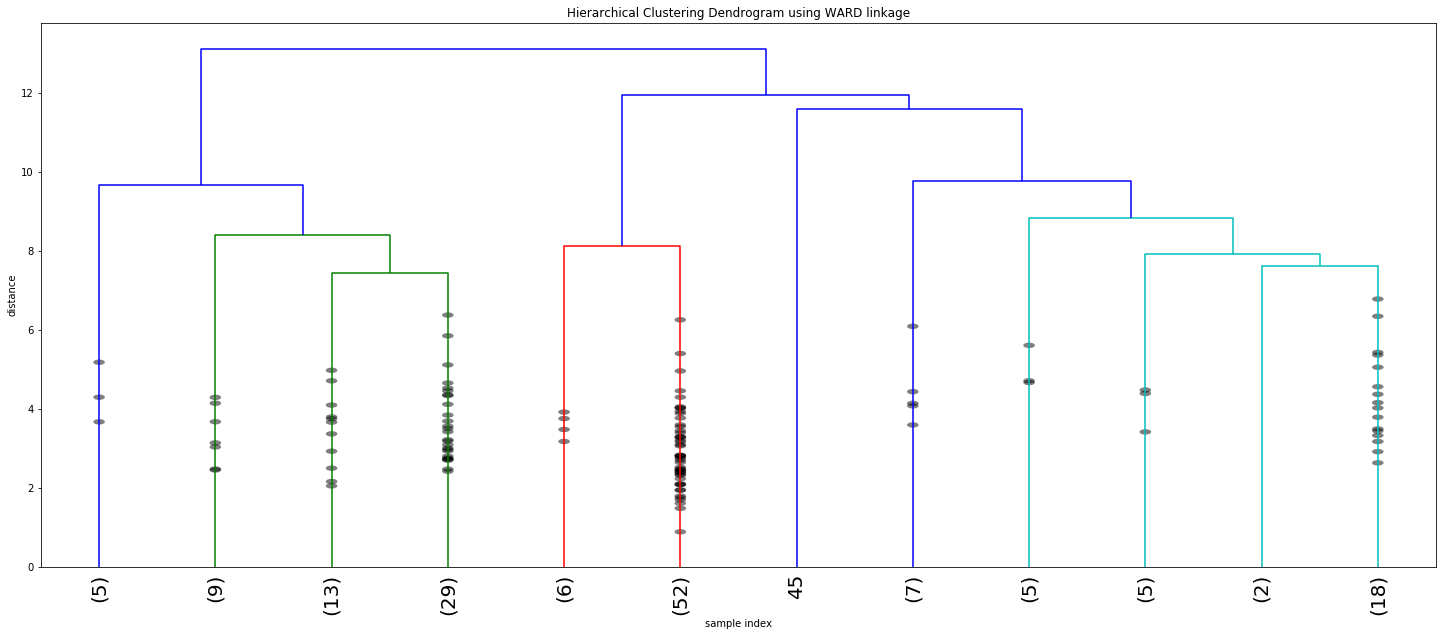

In [52]:
#Cophenet compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances
#1) Ward linkage
ward = linkage(tfidf, 'ward')
c, coph_dists = cophenet(ward, pdist(tfidf))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using WARD linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(ward, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.show()

In [53]:
c

0.35938903766907165

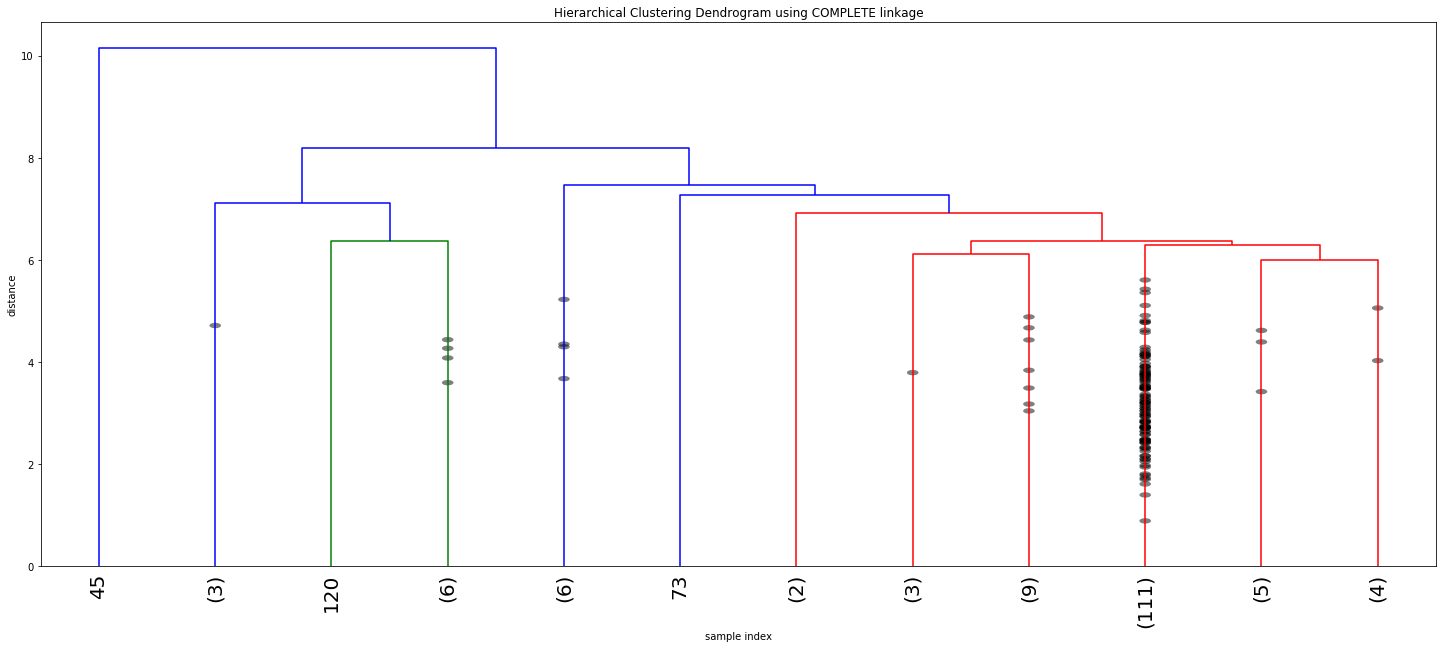

In [54]:
#2) Complete linkage
complete = linkage(tfidf, 'complete')
c, coph_dists = cophenet(complete, pdist(tfidf))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using COMPLETE linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(complete, truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.show()

In [55]:
c

0.8052935805683561

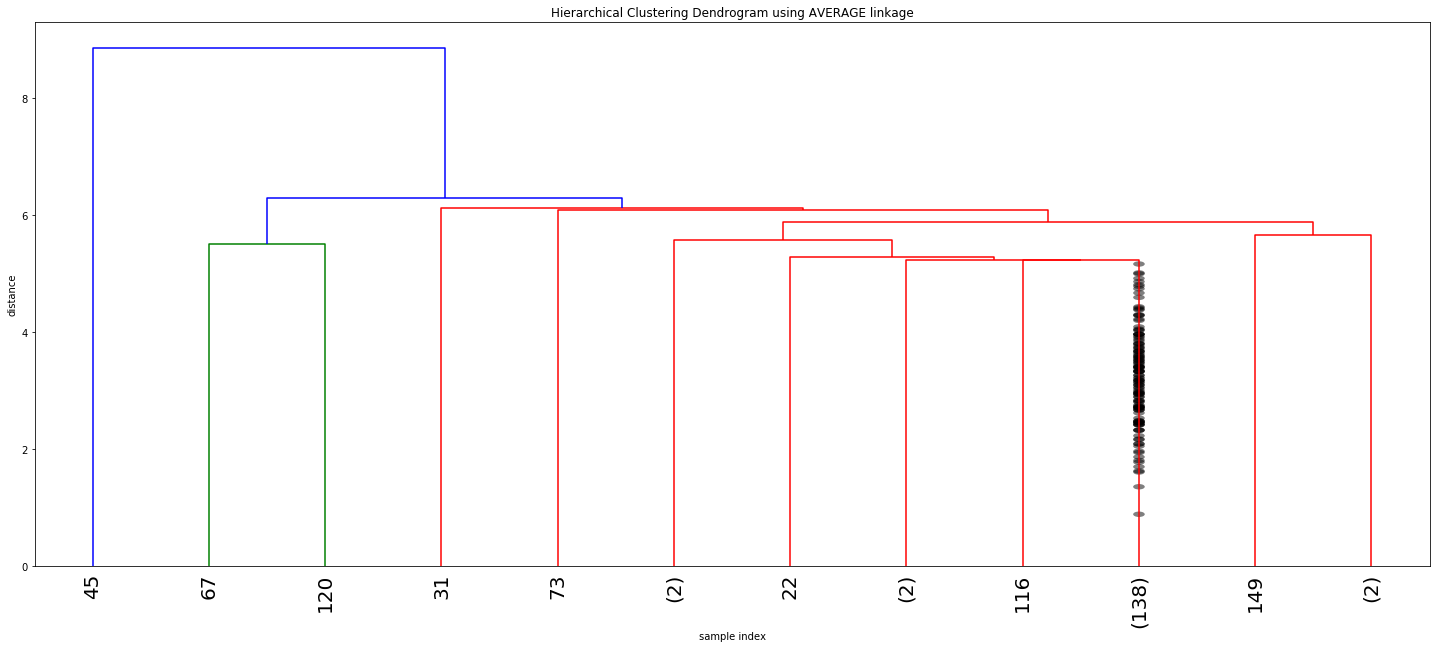

In [56]:
#3) Average linkage
average = linkage(tfidf, 'average')
c, coph_dists = cophenet(average, pdist(tfidf))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using AVERAGE linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(average, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.show()

In [59]:
c
#Best solution

0.9066750841717417